In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.irf import IRAnalysis
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [78]:
data = pd.read_csv("Question13.csv").set_index("Date")
data.index = pd.to_datetime(data.index)

In [79]:
data.head()

,Volume,realized_volatility,implied_volatility
Date,,,
2017-02-02,-23537.995587,8.837903,16.1939
2017-02-03,-54932.738897,9.464721,15.1332
2017-02-06,488004.007571,11.440489,16.4328
2017-02-07,64470.445165,8.552389,16.9147
2017-02-08,374958.159980,12.015388,16.8310


In [80]:
model = VAR(data)
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Dec, 2021
Time:                     08:06:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    28.5978
Nobs:                     1192.00    HQIC:                   28.5659
Log likelihood:          -22075.9    FPE:                2.49824e+12
AIC:                      28.5466    Det(Omega_mle):     2.47325e+12
--------------------------------------------------------------------
Results for equation Volume
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                    -128687.710342     27345.704161           -4.706           0.000
L1.Volume                      0.663794         0.029829           22.254           0.000
L1.realized_volatility 

In [81]:
model = VAR(data)
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Dec, 2021
Time:                     08:06:10
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    28.5842
Nobs:                     1191.00    HQIC:                   28.5284
Log likelihood:          -22017.4    FPE:                2.37163e+12
AIC:                      28.4946    Det(Omega_mle):     2.33030e+12
--------------------------------------------------------------------
Results for equation Volume
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                    -113032.979334     28238.364488           -4.003           0.000
L1.Volume                      0.631488         0.039803           15.865           0.000
L1.realized_volatility 

In [82]:
X_total = sm.add_constant(((data.drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_total = ((data.drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)

In [83]:
model_full = sm.OLS(Y_total,X_total)

In [84]:
results = model_full.fit()
results.params

const                 -300485.333964
realized_volatility     58649.387200
implied_volatility     -21200.746041
dtype: float64

In [89]:
data_1 = data[0:787]

In [90]:
X_total1 = sm.add_constant(((data_1.drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_total1 = ((data_1.drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)

In [91]:
model_full1 = sm.OLS(Y_total1,X_total1)
results = model_full1.fit()
results.params

const                 -837368.537615
realized_volatility     54782.673097
implied_volatility      16841.137701
dtype: float64

In [92]:
model = VAR(data_1)
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Dec, 2021
Time:                     08:07:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    27.8485
Nobs:                     786.000    HQIC:                   27.8047
Log likelihood:          -14250.3    FPE:                1.15749e+12
AIC:                      27.7773    Det(Omega_mle):     1.14000e+12
--------------------------------------------------------------------
Results for equation Volume
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                    -417228.190280     61951.937164           -6.735           0.000
L1.Volume                      0.587138         0.038712           15.167           0.000
L1.realized_volatility 

In [104]:
data_2 = data[787:]
X_total2 = sm.add_constant(((data_2.drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_total2 = ((data_2.drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)
model_full2 = sm.OLS(Y_total2,X_total2)
results = model_full2.fit()
results.params

const                 -195794.744810
realized_volatility     53726.091145
implied_volatility     -23587.426121
dtype: float64

In [105]:
model = VAR(data_2)
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Dec, 2021
Time:                     08:13:41
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    29.1557
Nobs:                     404.000    HQIC:                   29.0301
Log likelihood:          -7546.20    FPE:                3.73119e+12
AIC:                      28.9477    Det(Omega_mle):     3.54377e+12
--------------------------------------------------------------------
Results for equation Volume
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                    -178624.368667     60384.206626           -2.958           0.003
L1.Volume                      0.629028         0.069802            9.012           0.000
L1.realized_volatility 

In [95]:
# For the impl/realized
X_pre_covid = sm.add_constant(((data[0:787].drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_pre_covid = ((data[0:787].drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)
X_post_covid = sm.add_constant(((data[787:].drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_post_covid  = ((data[787:].drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)
X_total = sm.add_constant(((data.drop(columns='Volume',inplace=False)).reset_index()).drop(columns="Date",inplace=False))
Y_total = ((data.drop(columns=['implied_volatility','realized_volatility'],inplace=False)).reset_index()).drop(columns="Date",inplace=False)

In [67]:
model_pre = sm.OLS(Y_pre_covid,X_pre_covid)
model_post = sm.OLS(Y_post_covid,X_post_covid)
model_full = sm.OLS(Y_total,X_total)
result_pre = model_pre.fit()
result_post = model_post.fit()
result_full = model_full.fit()

SQER = ((result_full.resid)**2).sum()
SQE1 = ((result_pre.resid)**2).sum()
SQE2 = ((result_post.resid)**2).sum()
k = 2
N = 1193

Numerator = (SQER - (SQE1 + SQE2))/k
Denominator = (SQE1 + SQE2) / (N-2*k)

Chow_statistic = Numerator / Denominator
F_table_value = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=1193)

print("CHOW TEST: ")
if Chow_statistic>F_table_value:
    print("Chow statistic is "+ str(round(Chow_statistic,2)))
    print("Table value of the F distribution is "+ str(round(F_table_value,2))) 
    print("We can confirm the structural break on 95% confidence.")
else:
    print("We cannot confirm the structural break on 95% confidence.")

CHOW TEST: 
Chow statistic is 104.15
Table value of the F distribution is 3.0
We can confirm the structural break on 95% confidence.


In [68]:
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
   # sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=14, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients Post Covid',fontsize=10)
    #ax.set_ylabel('Coefficients',fontsize=10)
    ax.set_xlabel('',fontsize=12)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)
    for tick in ax.get_yticklabels():
        tick.set_rotation(90)
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    #Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    #[i.set_linewidth(1.0) for i in ax.spines.values()]
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    plt.savefig('postcoefficients.png', bbox_inches='tight')
    return plt.show()

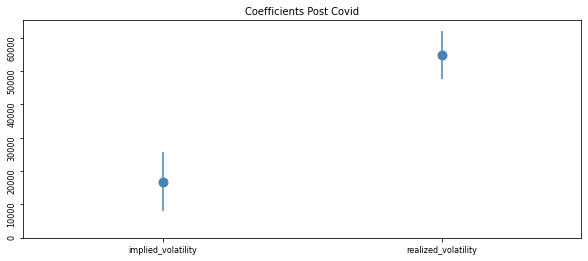

In [69]:
coefplot(result_pre)

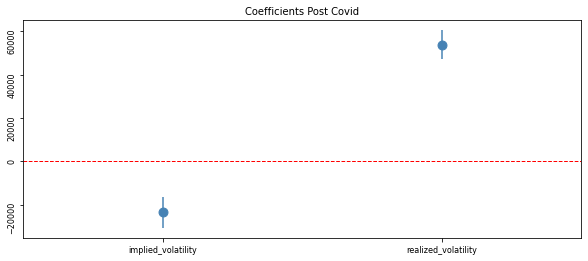

In [70]:
coefplot(result_post)

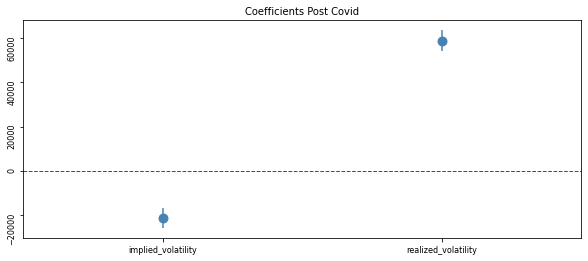

In [71]:
coefplot(result_full)